In [1]:
import splitfolders

In [2]:
splitfolders.ratio("leaf/train", output="leaf/data/", seed=1337, ratio=(.8, .2), group_prefix=None) # default values


In [2]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras import layers
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing.image import load_img , img_to_array , ImageDataGenerator
import sys
sys.setrecursionlimit(10000)

In [4]:
healthType = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [5]:
DATA_PATH = 'leaf/'

In [6]:
#import train data
train_datagen = ImageDataGenerator(rescale=1/255,
                                   shear_range = 0.3,
                                   zoom_range = 0.3,horizontal_flip = True,
                                   vertical_flip =  True ,
                                   rotation_range=60)


train_data = train_datagen.flow_from_directory(DATA_PATH+'train',
                                                 target_size = (244, 244),
                                                 class_mode='sparse',
                                                 shuffle=True,seed=1)

Found 70295 images belonging to 38 classes.


In [7]:
#import val data

val_datagen = ImageDataGenerator(rescale = 1/255)
val_data = val_datagen.flow_from_directory(DATA_PATH+'data/val',
                                                           target_size=(244,244),
                                                           class_mode='sparse',
                                                           shuffle=True,seed=1)

Found 14076 images belonging to 38 classes.


In [12]:
# import test data


test_datagen = ImageDataGenerator(rescale = 1/255)
test_data = test_datagen.flow_from_directory(DATA_PATH+'ser',
                                                           target_size=(244,244),
                                                           class_mode='sparse',
                                                           shuffle=False,seed=1)
modell = load_model('models/leaf-model.h5')

Found 10 images belonging to 2 classes.


In [65]:
# Defining Cnn
model = tf.keras.models.Sequential([
  layers.Conv2D(32, 3, activation='relu',input_shape=(244,244,3)),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.15),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.1),
  layers.Dense(38, activation= 'softmax')
])

print(model.input.shape) 

(None, 244, 244, 3)


In [66]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [67]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [ ]:
history = model.fit(train_data, validation_data= val_data, batch_size=32, epochs = 100, callbacks=[early])

Epoch 1/100
1389/2197 [=================>............] - ETA: 1:02:37 - loss: 2.2798 - accuracy: 0.3409

In [ ]:
model.evaluate(test_data)

In [ ]:
y_pred =  model.predict(test_data)
y_pred =  np.argmax(y_pred,axis=1)
len(test_data)
test_data.classes
y_pred

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

In [ ]:
def plot_confusion_matrix (cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
import itertools
cm = confusion_matrix(y_true = test_data.classes, y_pred = y_pred)
plot_confusion_matrix(cm, SoilType, title= 'confusion matrix')

In [ ]:
print(classification_report(test_data.classes, y_pred))

In [ ]:
model.save('models/leaf_model_31_March.h5')

In [ ]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

In [ ]:
plot_hist(history)

In [ ]:
def plot_hist_loss(hist):
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

In [ ]:
plot_hist_loss(history)

In [15]:
len(test_data)
test_data.classes

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [16]:
y_pred =  modell.predict(test_data)

In [17]:
y_pred =  np.argmax(y_pred,axis=1)
len(test_data)
test_data.classes
y_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [18]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

In [19]:
def plot_confusion_matrix (cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[5 0]
 [0 5]]


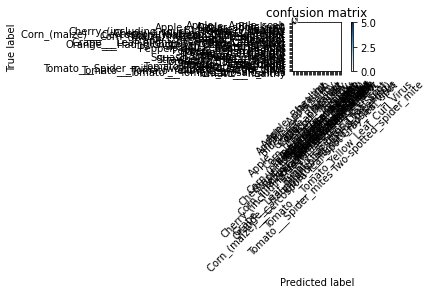

In [21]:
import itertools
cm = confusion_matrix(y_true = test_data.classes, y_pred = y_pred)
plot_confusion_matrix(cm, healthType, title= 'confusion matrix')

In [22]:
print(classification_report(test_data.classes, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [23]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()